<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [175]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
import re

In [7]:
for i in range(10):
    print(i)
    

0
1
2
3
4
5
6
7
8
9


In [35]:
92 % 10

2

In [16]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification'

In [1]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    ''' ВАШ КОД ЗДЕСЬ'''
    
    #Загрузка файлов пользователей
    files_paths = list(glob(os.path.join(path_to_csv_files,'user*.csv')))
    files = []
    user_IDs = []
    for path in tqdm_notebook(files_paths):
        f_name = os.path.split(path)[1]
        ID = int(re.findall("[0-9]+",f_name)[0])
        user_IDs.append(ID)
        files.append(pd.read_csv(path))
    user_IDs = np.array(user_IDs)
            
    #Получение словаря сайтов с ID и частотами
    if (session_length==10) and (window_size==10):#если так, то подгружаем уже готовый
        with open(site_freq_path,'rb') as f:
            sites_dict_sorted = pickle.load(f)
        f.close()
    else:        #иначе создаем из файлов пользователй
        sites_dictionary = {}
    
        for user in tqdm_notebook(files):
            for site in user.site.values:
                if site in sites_dictionary:
               
                    sites_dictionary[site] += 1                
                
                else:
                    sites_dictionary[site] = 1
              
        d =  sorted(sites_dictionary.items(), key=lambda item: item[1],reverse = True)    
        sites_dict_sorted = {}
    
        for ii,pair in enumerate(d):
        
            sites_dict_sorted[pair[0]] = [ii+1,pair[1]]  #заполнение словаря ID и частотами из отсортированного d
            
    
    # Заполнение таблицы пользовательских сессий ID просмотренных пользователем сайтов
    Session_list = []  
        
    for ind,user in enumerate(tqdm_notebook(files)): 
        session = np.zeros(session_length+1)
        session[session_length] = user_IDs[ind] #заполнение стобца ID пользователей
        
        sites = user.site.values
        ufile_length = sites.shape[0]
        site_position = 0 #позиция в сессии
        pos_in_ufile = 0 #позиция в файле
        while pos_in_ufile < ufile_length:            
            session[site_position]=sites_dict_sorted[sites[pos_in_ufile]][0]#получение ID сайта из словаря по названию
            pos_in_ufile += 1
            site_position += 1
            
            if site_position == session_length:
                Session_list.append(session)                  
                session = np.zeros(session_length+1)
                session[session_length] = user_IDs[ind]
                site_position = 0
                pos_in_ufile -= session_length - window_size
           
            if (pos_in_ufile == ufile_length) & (site_position != 0):
                Session_list.append(session)
                if site_position > window_size:
                    session = np.zeros(session_length+1)
                    session[session_length] = user_IDs[ind]               
                    pos_in_ufile -= site_position - window_size
                    site_position = 0  

    
    Sessions = np.array(Session_list,dtype = int)
    #print(Sessions)
    
    #10 5 5   150 7 7   150 5 5
    
    #Отделений ID пользователей от таблицы
    X, y = Sessions[:,:-1],Sessions[:,-1]
    
    #Получение разреженной матрицы частот встречаемости сайтов в каждой сессии      
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for s in tqdm_notebook(X):
        for ID in s:
            index = vocabulary.setdefault(ID, ID)
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))

    X_sparse = csr_matrix((data, indices, indptr), dtype=int)[:,1:] 
    
    
    return X_sparse, y#,sites_dict_sorted  
    
    

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [193]:
a=np.array([1,2,3,4,5])
a[:10]

array([1, 2, 3, 4, 5])

In [118]:
with open(os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'), 'rb') as f:
    data_new = pickle.load(f)
    f.close()
data_new

{'google.com': [1, 9],
 'oracle.com': [2, 8],
 'vk.com': [3, 3],
 'meduza.io': [4, 3],
 'mail.google.com': [5, 2],
 'football.kulichki.ru': [6, 2],
 'geo.mozilla.org': [7, 1],
 'accounts.google.com': [8, 1],
 'apis.google.com': [9, 1],
 'plus.google.com': [10, 1],
 'yandex.ru': [11, 1]}

In [284]:
%%time
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)


Wall time: 195 ms


In [280]:
y_s5_w3.shape

(28118,)

In [215]:
d = pd.DataFrame(dd).T
d[d[0]==66]

,0,1
pixel.alephd.com,66,2764


In [217]:
d[d[0]==1041]

,0,1
md1.libe.com,1041,127


In [239]:
mm =[[1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
    [3, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [3, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1],
    [2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
    [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

In [285]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [228]:
X_toy_s5_w3.todense()

MemoryError: 

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [92]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

In [1]:
%%time
prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'150users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_150users.pkl'),
                                       session_length=5, window_size=5)

NameError: name 'prepare_sparse_train_set_window' is not defined

In [158]:
import itertools
PATH_TO_DATA1 = 'capstone_user_identification\\result_w2'

In [155]:
g=11
l=44
print(f'Пример {g} {l}')

Пример 11 44


In [182]:
for num_users in [10,150]:
    for window_size,session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if (window_size<=session_length) and ((window_size,session_length) != (10,10)):
            print(num_users,session_length,window_size)

10 15 10
10 15 7
10 10 7
10 7 7
10 15 5
10 10 5
10 7 5
10 5 5
150 15 10
150 15 7
150 10 7
150 7 7
150 15 5
150 10 5
150 7 5
150 5 5


In [181]:
for num_users in [10,150]:
    for window_size,session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if (window_size<=session_length) and ((session_length,window_size) != (10,10)):
            print(num_users,session_length,window_size)

10 15 10
10 15 7
10 10 7
10 7 7
10 15 5
10 10 5
10 7 5
10 5 5
150 15 10
150 15 7
150 10 7
150 7 7
150 15 5
150 10 5
150 7 5
150 5 5


In [ ]:
10 5 5   150 7 7   150 5 5

In [289]:
%%time
data_lengths = []
counter = 0
for num_users in [10,150]:
    for window_size,session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if (window_size<=session_length) and ((session_length,window_size) != (10,10)):
            counter +=1
            print(counter)
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,str(num_users)+'users'), 
                                                '_', session_length=session_length, window_size=window_size)
            
            with open(os.path.join(PATH_TO_DATA1,f'X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl'),'wb') as Xs_pickle:
                pickle.dump(X_sparse,Xs_pickle,protocol=2)
            with open(os.path.join(PATH_TO_DATA1,f'y_{num_users}users_s{session_length}_w{window_size}.pkl'),'wb') as y_pickle:
                pickle.dump(y,y_pickle,protocol=2)  
            

                        
            data_lengths.append(y.shape[0])
           

1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



Wall time: 2min 12s


**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [ ]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = ''' ВАШ КОД ЗДЕСЬ '''

**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [288]:
''' ВАШ КОД ЗДЕСЬ '''
res = " ".join([str(l) for l in data_lengths])
res ВЕРНЫЙ

'14061 20087 20087 20087 28118 28118 28118 28118 137019 195712 195712 195712 273957 273957 273957 273957'

In [184]:
res = " ".join([str(l) for l in data_lengths])
res НЕВЕРНЫЙ

'14061 20087 20087 20087 28118 28118 28118 28121 137019 195712 195712 195728 273957 273957 273957 274000'

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [292]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [293]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_ID
session_id,,,,,,,,,,,
0,192,574,133,3,133,133,3,133,203,133,31
1,415,193,674,254,133,31,393,3305,217,55,31
2,55,3,55,55,5,293,415,333,897,55,31
3,473,3306,473,55,55,55,55,937,199,123,31
4,342,55,5,3307,258,211,3308,2086,675,2086,31


In [11]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,193,574,133,3,133,133,3,133,203,133,31
1,415,192,675,254,133,31,393,3634,217,55,31
2,55,3,55,55,5,293,415,333,900,55,31
3,473,3395,473,55,55,55,55,944,199,123,31
4,342,55,5,3458,258,211,3369,2096,674,2096,31


In [294]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_ID    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [296]:
train_df['user_ID'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_ID, dtype: int64

In [13]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [297]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [298]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

In [15]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

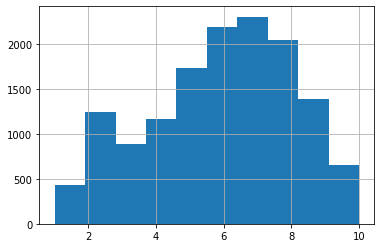

In [299]:
pd.Series(num_unique_sites).hist()

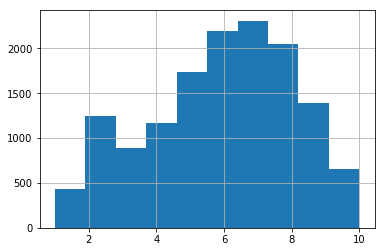

In [16]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

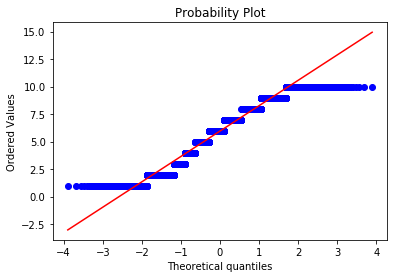

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


In [306]:
''' ВАШ КОД ЗДЕСЬ '''
stats.probplot(num_unique_sites, plot=plt)
plt.show()
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [305]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
has_two_similar 

array([1, 0, 1, ..., 1, 1, 1])

In [313]:
''' ВАШ КОД ЗДЕСЬ '''
pi_val = stats.binom_test(sum(has_two_similar),has_two_similar.shape[0], p=0.95,alternative = 'greater')
pi_val


0.02207653769072678

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [314]:
wilson_interval = proportion_confint(sum(has_two_similar), has_two_similar.shape[0], method = 'wilson')
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [315]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [317]:
with open(os.path.join(PATH_TO_DATA,'site_freq_10users.pkl'), 'rb') as f:
    freq_dict = pickle.load(f)
    f.close()
freq_dict

{'s.youtube.com': [1, 8300],
 'www.google.fr': [2, 7813],
 'www.google.com': [3, 5441],
 'mail.google.com': [4, 4158],
 'www.facebook.com': [5, 4141],
 'apis.google.com': [6, 3758],
 'r3---sn-gxo5uxg-jqbe.googlevideo.com': [7, 3244],
 'r1---sn-gxo5uxg-jqbe.googlevideo.com': [8, 3094],
 'plus.google.com': [9, 2630],
 'accounts.google.com': [10, 2089],
 'r2---sn-gxo5uxg-jqbe.googlevideo.com': [11, 1939],
 'fr-mg42.mail.yahoo.com': [12, 1868],
 'www.youtube.com': [13, 1804],
 'r4---sn-gxo5uxg-jqbe.googlevideo.com': [14, 1702],
 'clients1.google.com': [15, 1493],
 'download.jboss.org': [16, 1441],
 's-static.ak.facebook.com': [17, 1388],
 'static.ak.facebook.com': [18, 1265],
 'i1.ytimg.com': [19, 1232],
 'twitter.com': [20, 1204],
 'accounts.youtube.com': [21, 1057],
 'platform.twitter.com': [22, 1041],
 'clients6.google.com': [23, 1039],
 'safebrowsing-cache.google.com': [24, 1039],
 'translate.google.fr': [25, 1002],
 'api.twitter.com': [26, 982],
 'accounts.google.fr': [27, 974],
 'tal

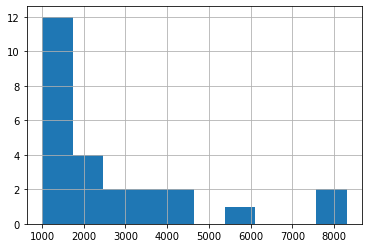

In [327]:
df_freqs = pd.DataFrame(freq_dict).T
df_freqs[df_freqs[1]>=1000][1].hist()

In [325]:
df_freqs[df_freqs[1]>=1000].shape

(25, 2)

In [329]:
df_freqs[df_freqs[1]>=1000][1].values

array([8300, 7813, 5441, 4158, 4141, 3758, 3244, 3094, 2630, 2089, 1939,
       1868, 1804, 1702, 1493, 1441, 1388, 1265, 1232, 1204, 1057, 1041,
       1039, 1039, 1002], dtype=int64)

In [331]:
''' ВАШ КОД ЗДЕСЬ '''
site_freqs = df_freqs[df_freqs[1]>=1000][1].values
site_freqs

array([8300, 7813, 5441, 4158, 4141, 3758, 3244, 3094, 2630, 2089, 1939,
       1868, 1804, 1702, 1493, 1441, 1388, 1265, 1232, 1204, 1057, 1041,
       1039, 1039, 1002], dtype=int64)

In [332]:
''' ВАШ КОД ЗДЕСЬ '''
len(freq_dict)

4913

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [333]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [334]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [360]:
samples = get_bootstrap_samples(df_freqs[1].values,len(df_freqs[1].values))
samples

array([[  2,   3,  39, ...,   2,   1,  32],
       [  2,   2,   2, ...,   4,   9,   1],
       [  1,   1,  37, ...,   2,   7,   1],
       ...,
       [104,   6,   1, ...,  75,   1,   1],
       [  9,   1,   3, ...,   1,   3,   5],
       [  3,   7,   1, ...,   2,   1,  19]], dtype=int64)

In [379]:
''' ВАШ КОД ЗДЕСЬ '''
means = list(map(np.mean, samples))
df_freqs[1].values.mean()

28.612660289029108

In [378]:
left = stat_intervals(means,0.05)[0]
right = stat_intervals(means,0.05)[1]
print(round(left,3),round(right,3))

22.515 35.763


## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.